In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("VIX_data.csv")

In [35]:
data['Date'] = pd.to_datetime(data['Date'])
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)

In [36]:
X = data_clean.drop(columns=['VIX','Date'])
y = data_clean['VIX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.9943649197199396

In [40]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [41]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

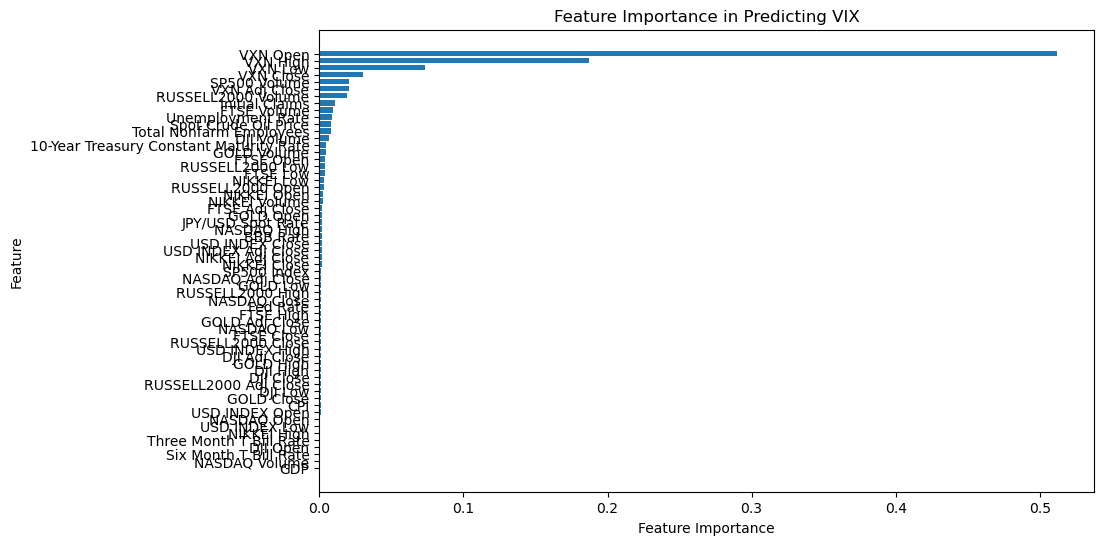

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

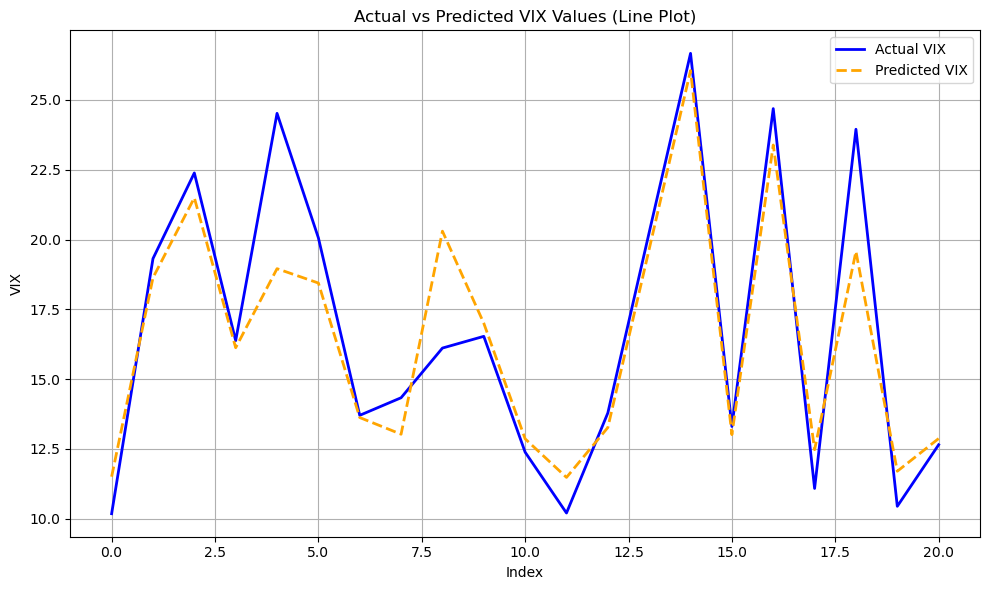

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()